In [3]:
import rmgpy
from rmgpy.data.rmg import RMGDatabase
from rmgpy.reaction import Reaction
from rmgpy.molecule.molecule import Molecule

In [1]:
databasePath = rmgpy.settings['database.directory']

database = RMGDatabase()
database.load(
    path = databasePath,
    thermoLibraries = [],
    reactionLibraries = [],
    seedMechanisms = [],
    kineticsFamilies = ['H_Abstraction'],
    )

In [8]:
reactants = [
    Molecule().fromAdjacencyList("""multiplicity 2
1  C u0 p0 c0 {3,S} {4,D} {7,S}
2  C u0 p0 c0 {5,S} {6,D} {8,S}
3  C u0 p0 c0 {1,S} {5,D} {10,S}
4  C u0 p0 c0 {1,D} {6,S} {12,S}
5  C u0 p0 c0 {2,S} {3,D} {9,S}
6  C u0 p0 c0 {2,D} {4,S} {11,S}
7  C u0 p0 c0 {1,S} {13,D} {14,S}
8  O u0 p2 c0 {2,S} {15,S}
9  H u0 p0 c0 {5,S}
10 H u0 p0 c0 {3,S}
11 H u0 p0 c0 {6,S}
12 O u1 p2 c0 {4,S}
13 O u0 p2 c0 {7,D}
14 H u0 p0 c0 {7,S}
15 H u0 p0 c0 {8,S}"""), 
    Molecule().fromAdjacencyList("""multiplicity 2
1  C u0 p0 c0 {2,B} {3,B} {7,S}
2  C u0 p0 c0 {1,B} {4,B} {8,S}
3  C u0 p0 c0 {1,B} {6,B} {11,S}
4  C u0 p0 c0 {2,B} {5,B} {12,S}
5  C u0 p0 c0 {4,B} {6,B} {9,S}
6  C u0 p0 c0 {3,B} {5,B} {10,S}
7  C u0 p0 c0 {1,S} {13,D} {14,S}
8  O u0 p2 c0 {2,S} {15,S}
9  O u1 p2 c0 {5,S}
10 H u0 p0 c0 {6,S}
11 H u0 p0 c0 {3,S}
12 H u0 p0 c0 {4,S}
13 O u0 p2 c0 {7,D}
14 H u0 p0 c0 {7,S}
15 H u0 p0 c0 {8,S}""")]

In [10]:
reactions = database.kinetics.families['H_Abstraction'].generateReactions(reactants)

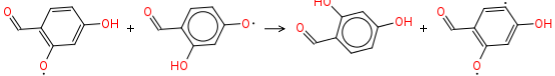

In [11]:
reactions[0]

In [ ]:
"""
Error: Expecting one matching reverse reaction, not 2 in reaction family H_Abstraction for forward reaction 
    <Molecule "[O]C1C=C(O)C=CC=1C=O"> + <Molecule "[O]c1ccc(C=O)c(O)c1"> <=> 
    <Molecule "O=Cc1ccc(O)cc1O"> + <Molecule "[O]C1C=CC(C=O)=C([O])C=1">.
"""